**Milestone 1:**

In [1]:
pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.7 MB/s eta 0:00:00


In [2]:
# STEP 1: Import Libraries
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from category_encoders import LeaveOneOutEncoder

In [3]:
#STEP 2: Load Dataset
# ============================================================
file_path = "/content/crop_yield_dataset.csv"
df = pd.read_csv(file_path)


(df['Crop_Yield'] == 0).sum()


np.int64(11025)

print(df.columns)

Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


In [4]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [5]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [6]:


df = df[df['Crop_Yield'] != 0]

In [7]:
# STEP 3: First Look at Dataset
# ============================================================
print("✅ First 5 rows:")
print(df.head())

✅ First 5 rows:
        Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  Wind_Speed  \
1 2014-01-01      Corn     Loamy     6.50    20.052576  79.947424    8.591577   
3 2014-01-01    Barley     Sandy     6.75    19.751848  80.000000    2.682683   
4 2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000    7.696070   
5 2014-01-01    Cotton     Sandy     6.75    14.826739  80.000000   10.366657   
7 2014-01-01    Tomato      Clay     6.25    18.323272  80.000000    8.198084   

      N     P     K  Crop_Yield  Soil_Quality  
1  84.0  66.0  50.0  104.871310     66.666667  
3  50.0  40.0  30.0   58.939796     35.000000  
4  49.5  45.0  38.5   32.970413     22.166667  
5  55.0  44.0  36.0   29.356115     39.375000  
7  60.0  45.0  40.0   22.221375     42.291667  


In [8]:

df = df.reset_index(drop=True)

In [9]:
# Check the number of remaining rows
print("✅ Zero-yield rows dropped successfully!")
print("Remaining rows:", len(df))

✅ Zero-yield rows dropped successfully!
Remaining rows: 25495


In [10]:
print("\n✅ Dataset Info:")
print(df.info())


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25495 entries, 0 to 25494
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          25495 non-null  datetime64[ns]
 1   Crop_Type     25495 non-null  object        
 2   Soil_Type     25495 non-null  object        
 3   Soil_pH       25495 non-null  float64       
 4   Temperature   25495 non-null  float64       
 5   Humidity      25495 non-null  float64       
 6   Wind_Speed    25495 non-null  float64       
 7   N             25495 non-null  float64       
 8   P             25495 non-null  float64       
 9   K             25495 non-null  float64       
 10  Crop_Yield    25495 non-null  float64       
 11  Soil_Quality  25495 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 2.3+ MB
None


In [11]:
print("\n✅ Missing Values:")
print(df.isnull().sum())


✅ Missing Values:
Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
dtype: int64


In [12]:

print("\n✅ Basic Statistics:")
print(df.describe(include='all'))


✅ Basic Statistics:
                                 Date Crop_Type Soil_Type      Soil_pH  \
count                           25495     25495     25495  25495.00000   
unique                            NaN        10         5          NaN   
top                               NaN      Rice    Saline          NaN   
freq                              NaN      2569      5129          NaN   
mean    2019-01-01 12:38:32.924102912       NaN       NaN      6.60051   
min               2014-01-01 00:00:00       NaN       NaN      5.50000   
25%               2016-06-03 00:00:00       NaN       NaN      6.25000   
50%               2019-01-03 00:00:00       NaN       NaN      6.50000   
75%               2021-06-13 12:00:00       NaN       NaN      6.75000   
max               2023-12-31 00:00:00       NaN       NaN      8.00000   
std                               NaN       NaN       NaN      0.81741   

         Temperature      Humidity    Wind_Speed             N             P  \
count   25

In [13]:
# STEP 4: Basic EDA (Exploratory Data Analysis)
# ============================================================
# 1. Check data types
print("\nData Types:\n", df.dtypes)


Data Types:
 Date            datetime64[ns]
Crop_Type               object
Soil_Type               object
Soil_pH                float64
Temperature            float64
Humidity               float64
Wind_Speed             float64
N                      float64
P                      float64
K                      float64
Crop_Yield             float64
Soil_Quality           float64
dtype: object


In [14]:
# 2. Check unique values for categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")



Unique values in Crop_Type: ['Corn' 'Barley' 'Soybean' 'Cotton' 'Tomato' 'Potato' 'Sunflower' 'Wheat'
 'Sugarcane' 'Rice']

Unique values in Soil_Type: ['Loamy' 'Sandy' 'Peaty' 'Clay' 'Saline']


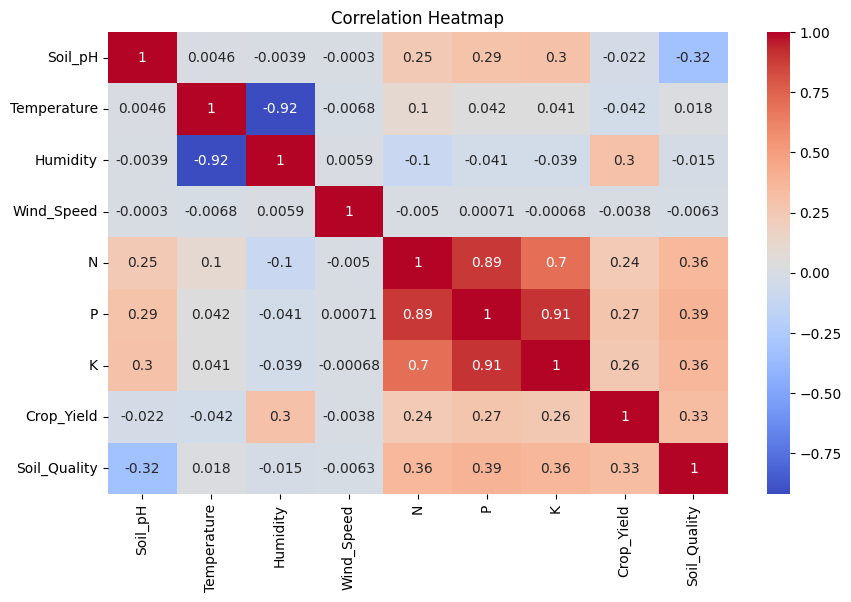

In [15]:
# 3. Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

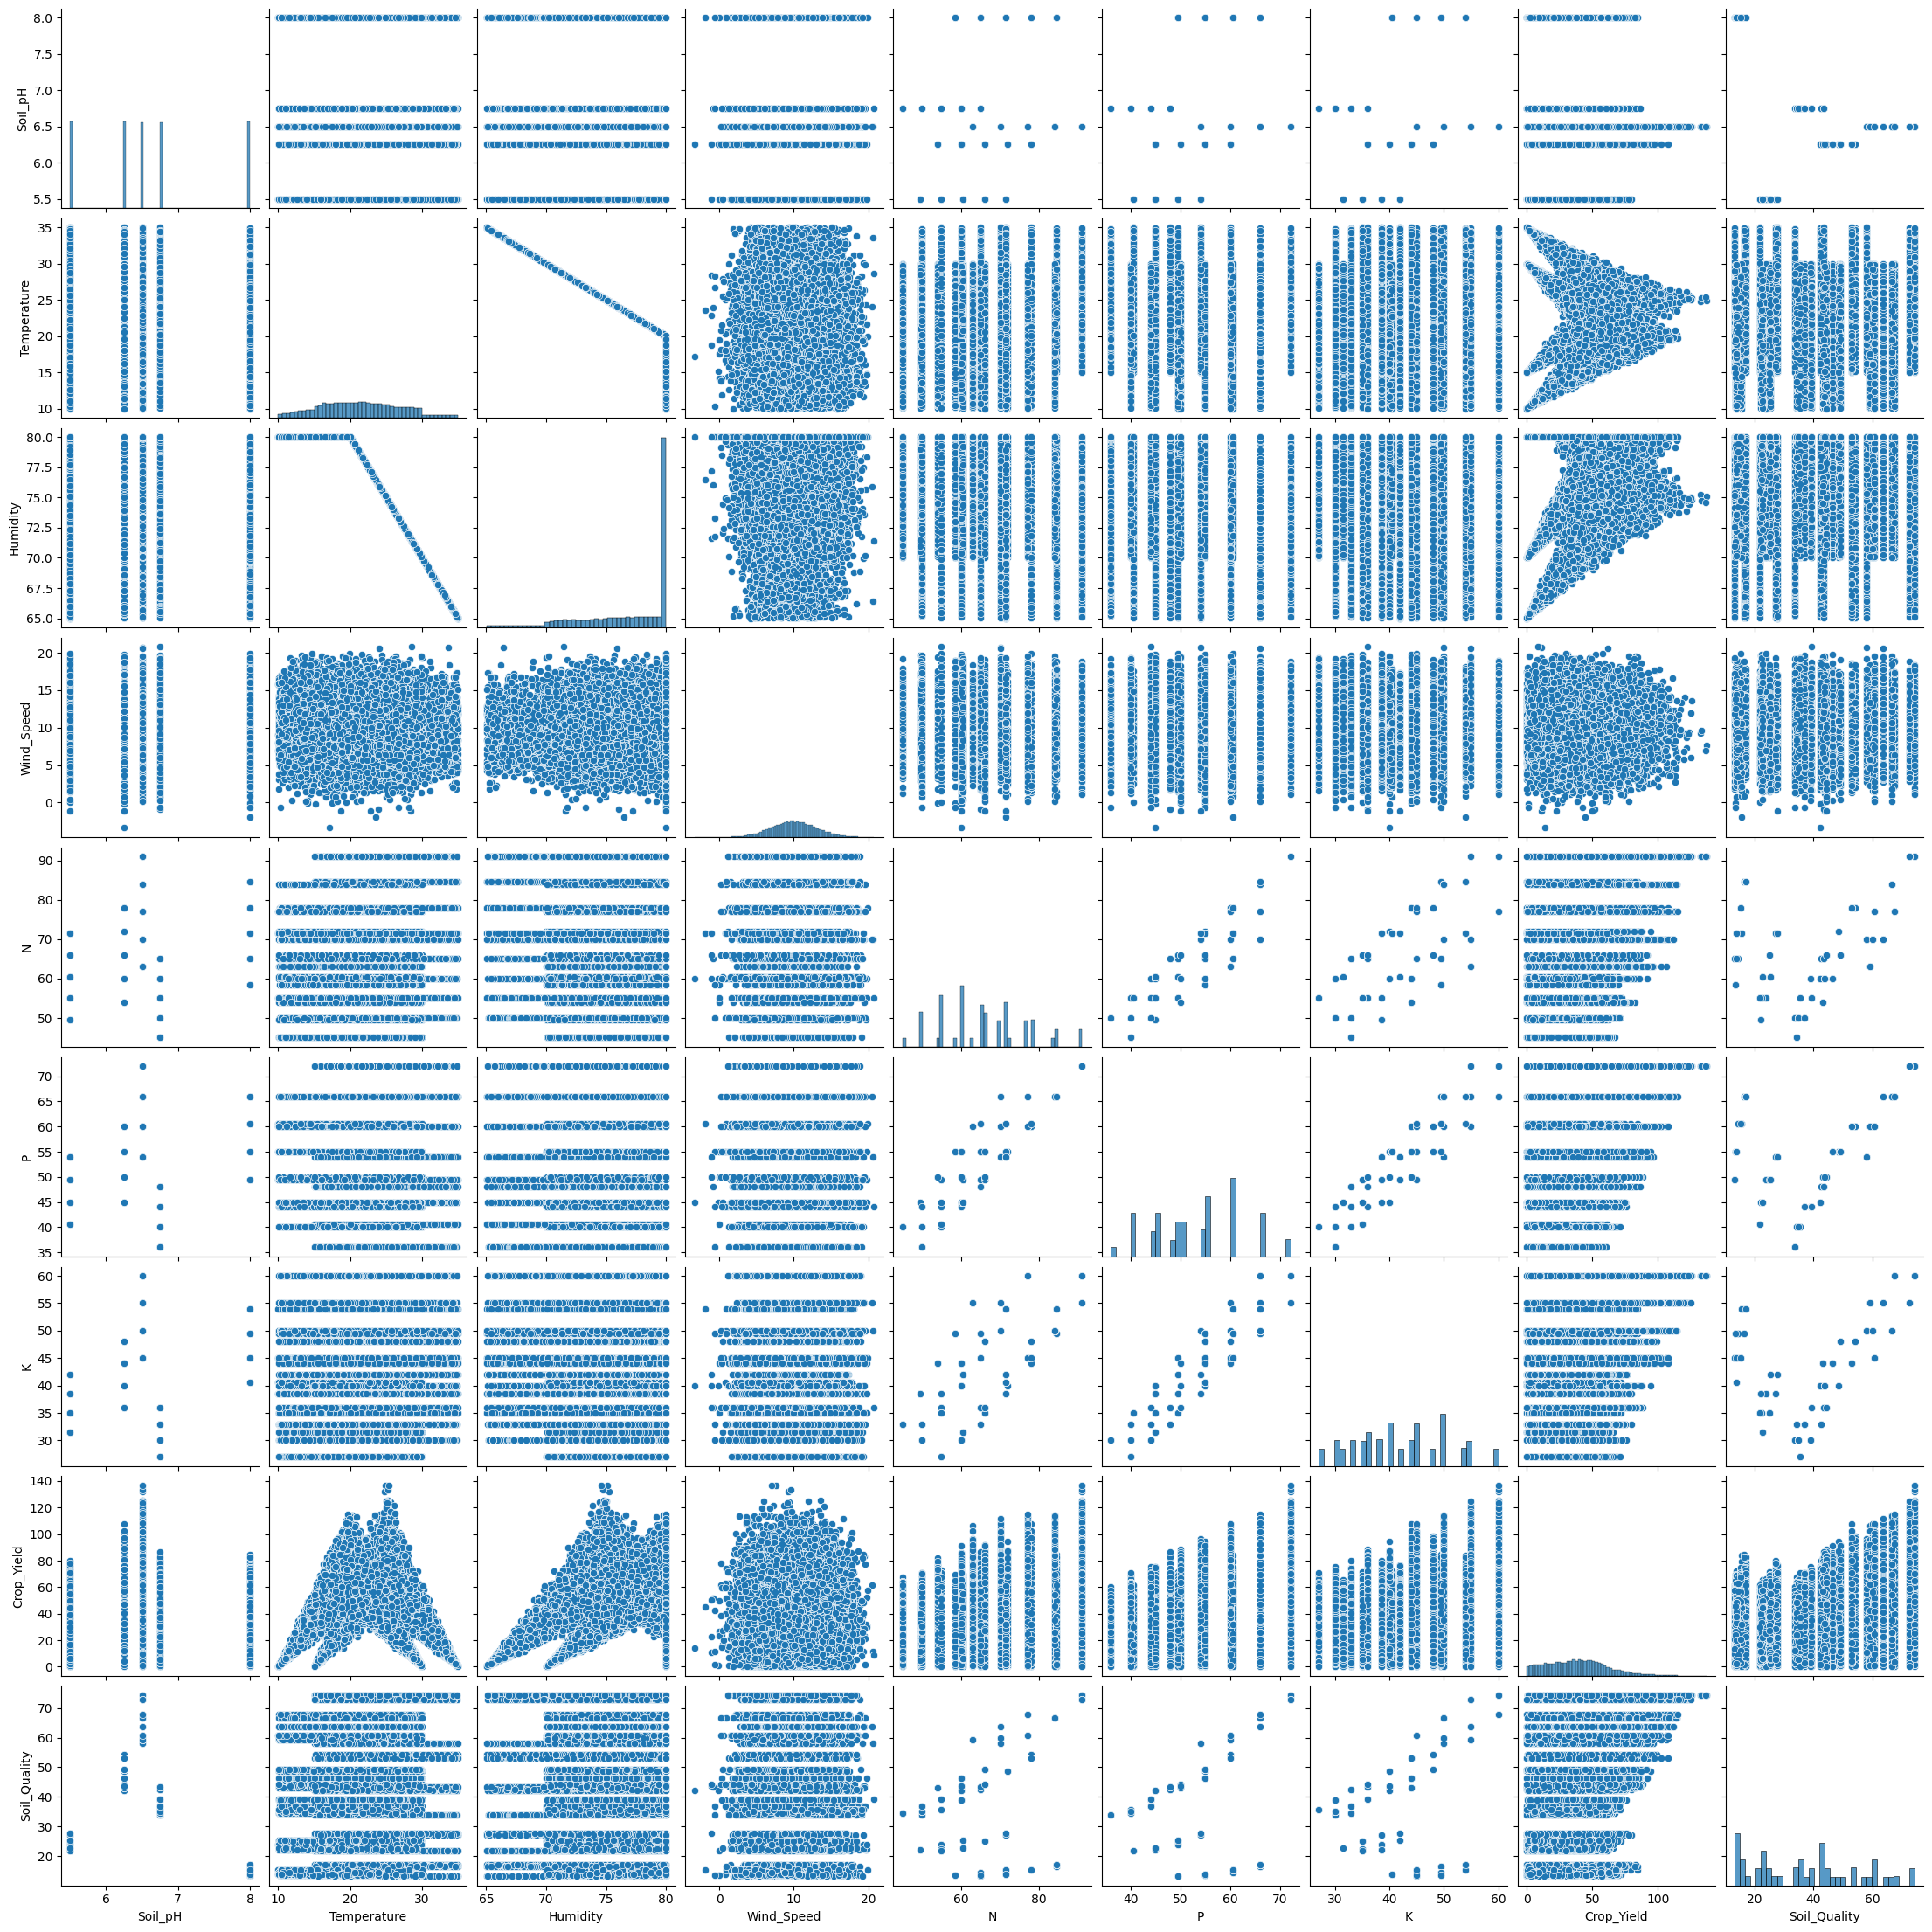

In [16]:
# 4. Pairplot for numeric relationships
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

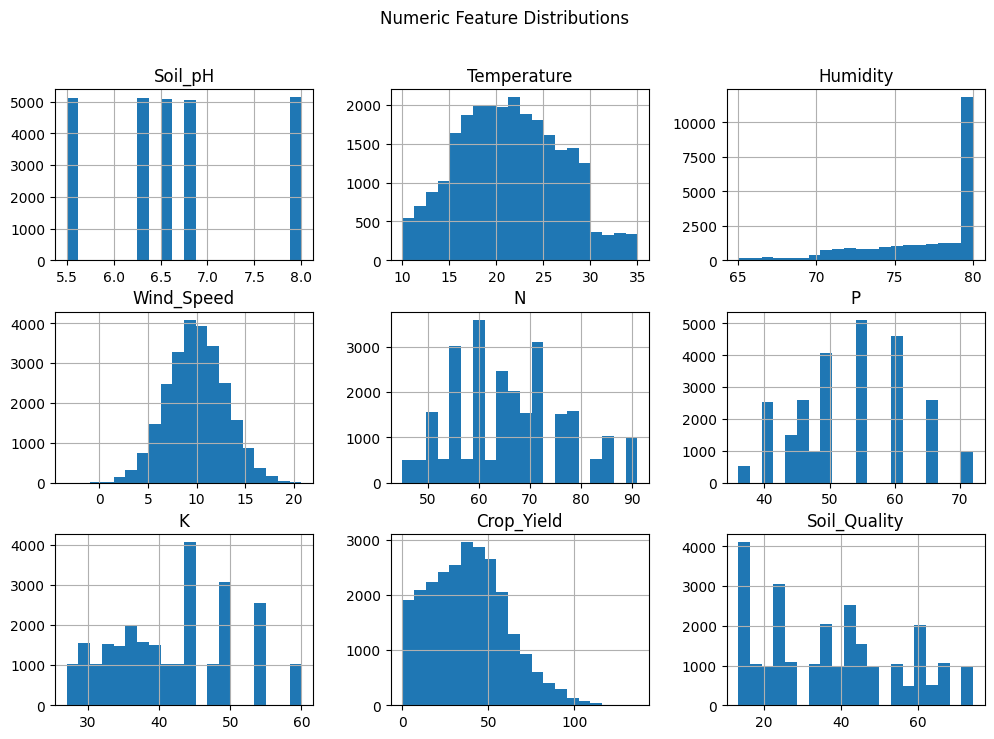

In [17]:
# 5. Distribution of numeric columns
df.select_dtypes(include=np.number).hist(figsize=(12, 8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

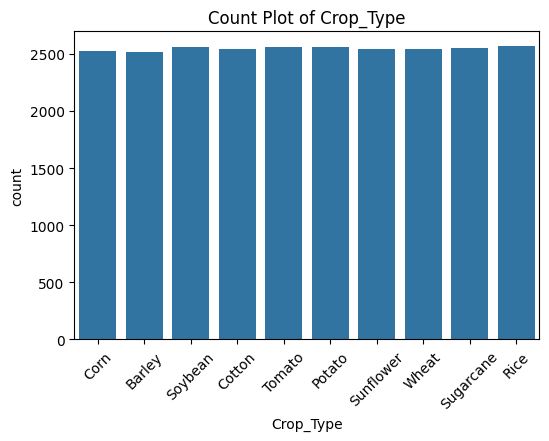

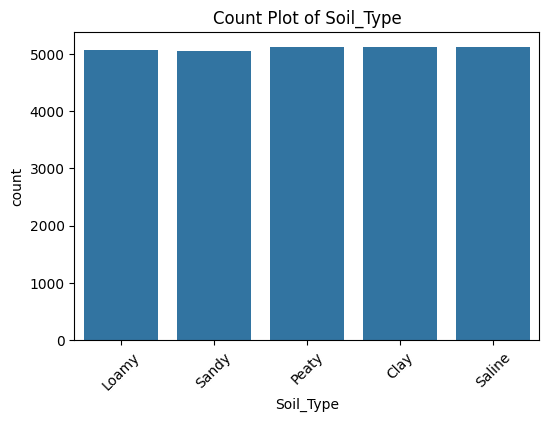

In [18]:
# 6. Countplot for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [19]:
#STEP 5: One Hot Encoding + Scaling (MinMax + Standard)
# ============================================================
df_onehot = df.copy()

# Apply One Hot Encoding
df_onehot = pd.get_dummies(df_onehot, drop_first=True)

In [20]:
df_onehot.head()

,Date,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,...,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Sunflower,Crop_Type_Tomato,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Saline,Soil_Type_Sandy
0,2014-01-01,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,...,False,False,False,False,False,False,True,False,False,False
1,2014-01-01,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,...,False,False,False,False,False,False,False,False,False,True
2,2014-01-01,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,...,False,True,False,False,False,False,False,True,False,False
3,2014-01-01,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000,...,False,False,False,False,False,False,False,False,False,True
4,2014-01-01,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667,...,False,False,False,False,True,False,False,False,False,False


In [21]:
# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
# Drop the 'Date' column before scaling
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_onehot.drop(columns=['Date'])), columns=df_onehot.drop(columns=['Date']).columns)

In [22]:
df_minmax.head()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Crop_Type_Corn,...,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Sunflower,Crop_Type_Tomato,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Saline,Soil_Type_Sandy
0,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Apply StandardScaler
std_scaler = StandardScaler()
df_standard = pd.DataFrame(std_scaler.fit_transform(df_onehot.drop(columns=['Date'])), columns=df_onehot.drop(columns=['Date']).columns)

In [24]:
df_standard.head()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Crop_Type_Corn,...,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Sunflower,Crop_Type_Tomato,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Saline,Soil_Type_Sandy
0,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,2.963444,1.647104,3.016791,...,-0.334748,-0.334458,-0.333805,-0.333152,-0.334531,-0.333152,2.007384,-0.500980,-0.501838,-0.497547
1,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,0.912572,-0.141463,-0.331478,...,-0.334748,-0.334458,-0.333805,-0.333152,-0.334531,-0.333152,-0.498161,-0.500980,-0.501838,2.009859
2,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,-0.246978,-0.866303,-0.331478,...,-0.334748,2.989912,-0.333805,-0.333152,-0.334531,-0.333152,-0.498161,1.996086,-0.501838,-0.497547
3,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,-0.408358,0.105642,-0.331478,...,-0.334748,-0.334458,-0.333805,-0.333152,-0.334531,-0.333152,-0.498161,-0.500980,-0.501838,2.009859
4,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,-0.726929,0.270378,-0.331478,...,-0.334748,-0.334458,-0.333805,-0.333152,2.989264,-0.333152,-0.498161,-0.500980,-0.501838,-0.497547


In [25]:
# Save both as CSV
df_minmax.to_csv("/content/crop_yield_onehot_minmax.csv", index=False)
df_standard.to_csv("/content/crop_yield_onehot_standard.csv", index=False)
print("\n✅ Saved OneHot Encoded datasets with MinMax & Standard Scaling")


✅ Saved OneHot Encoded datasets with MinMax & Standard Scaling


In [26]:
# STEP 6: Leave One Out Encoding + Scaling
# ============================================================
df_loo = df.copy()

# Apply Leave-One-Out Encoding for categorical features
loo = LeaveOneOutEncoder(cols=cat_cols)
df_loo_encoded = loo.fit_transform(df_loo, df_loo.select_dtypes(include=np.number).iloc[:,0])  # using first numeric column as target proxy

In [30]:
# Apply minmax scaler
df_loo_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_loo_encoded.drop(columns=['Date'])), columns=df_loo_encoded.drop(columns=['Date']).columns)


In [31]:

df_loo_minmax.head()

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,0.992452,0.4,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403
1,0.237661,0.5,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631
2,0.744878,0.0,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392
3,0.541790,0.5,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304
4,0.844286,0.3,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085


In [32]:
#Apply standard scaler
df_loo_standard = pd.DataFrame(std_scaler.fit_transform(df_loo_encoded.drop(columns=['Date'])), columns=df_loo_encoded.drop(columns=['Date']).columns)


In [33]:
df_loo_standard.head()


,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,1.663669,-0.122964,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,2.963444,1.647104
1,-1.148232,0.182886,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,0.912572,-0.141463
2,0.741357,-1.346363,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,-0.246978,-0.866303
3,-0.015227,0.182886,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,-0.408358,0.105642
4,1.111690,-0.428814,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,-0.726929,0.270378


In [34]:
# Save
df_loo_minmax.to_csv("/content/crop_yield_loo_minmax.csv", index=False)
df_loo_standard.to_csv("/content/crop_yield_loo_standard.csv", index=False)
print("\n✅ Saved Leave-One-Out Encoded datasets with MinMax & Standard Scaling")


✅ Saved Leave-One-Out Encoded datasets with MinMax & Standard Scaling


In [42]:
# STEP 7: Label Encoding + Scaling
# ============================================================
df_label = df.copy()

# Apply Label Encoding for categorical columns
le = LabelEncoder()
for col in cat_cols:
    df_label[col] = le.fit_transform(df_label[col])

In [44]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# Exclude datetime and non-numeric columns
df_label_numeric = df_label.select_dtypes(include=['number'])

# Apply scaling only on numeric columns
df_label_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(df_label_numeric),
    columns=df_label_numeric.columns
)

# If you want to keep non-numeric columns as well (like 'Date'), reattach them
df_label_minmax = pd.concat(
    [df_label[['Date']], df_label_minmax],
    axis=1
)

df_label_minmax.head()


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,0.111111,0.25,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403
1,2014-01-01,0.000000,1.00,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631
2,2014-01-01,0.555556,0.50,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392
3,2014-01-01,0.222222,1.00,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304
4,2014-01-01,0.888889,0.00,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085


In [45]:
df_label_minmax.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,0.111111,0.25,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403
1,2014-01-01,0.000000,1.00,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631
2,2014-01-01,0.555556,0.50,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392
3,2014-01-01,0.222222,1.00,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304
4,2014-01-01,0.888889,0.00,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085


In [47]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# Select only numeric columns
df_label_numeric = df_label.select_dtypes(include=['number'])

# Apply StandardScaler to numeric columns only
df_label_standard = pd.DataFrame(
    std_scaler.fit_transform(df_label_numeric),
    columns=df_label_numeric.columns
)

# (Optional) Reattach Date column if you still want to keep it
df_label_standard = pd.concat(
    [df_label[['Date']], df_label_standard],
    axis=1
)

df_label_standard.head()


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,-1.224493,-0.705665,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,2.963444,1.647104
1,2014-01-01,-1.573283,1.416992,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,0.912572,-0.141463
2,2014-01-01,0.170667,0.001887,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,-0.246978,-0.866303
3,2014-01-01,-0.875703,1.416992,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,-0.408358,0.105642
4,2014-01-01,1.217037,-1.413217,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,-0.726929,0.270378


In [48]:


df_label_standard.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,-1.224493,-0.705665,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,2.963444,1.647104
1,2014-01-01,-1.573283,1.416992,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,0.912572,-0.141463
2,2014-01-01,0.170667,0.001887,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,-0.246978,-0.866303
3,2014-01-01,-0.875703,1.416992,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,-0.408358,0.105642
4,2014-01-01,1.217037,-1.413217,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,-0.726929,0.270378


In [49]:
# Save
df_label_minmax.to_csv("/content/crop_yield_label_minmax.csv", index=False)
df_label_standard.to_csv("/content/crop_yield_label_standard.csv", index=False)
print("\n✅ Saved Label Encoded datasets with MinMax & Standard Scaling")

print("\n🎯 All files saved successfully")


✅ Saved Label Encoded datasets with MinMax & Standard Scaling

🎯 All files saved successfully


In [50]:

df.sample(5)

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
16875,2020-09-15,Barley,Sandy,6.75,16.686753,80.000000,12.805635,50.0,40.0,30.0,40.369183,35.000000
4507,2015-10-21,Corn,Sandy,6.75,19.301273,80.000000,12.340011,60.0,44.0,30.0,65.615980,39.083333
3708,2015-05-20,Barley,Saline,8.00,20.868048,79.131952,10.621806,65.0,55.0,45.0,55.295525,13.750000
13145,2019-02-25,Sunflower,Sandy,6.75,12.686315,80.000000,8.347455,50.0,44.0,33.0,15.962274,37.041667
18713,2021-04-19,Corn,Clay,6.25,29.724660,70.275340,10.572206,72.0,55.0,40.0,2.228121,48.708333


In [51]:
df.isnull().sum()

,0
Date,0
Crop_Type,0
Soil_Type,0
Soil_pH,0
Temperature,0
Humidity,0
Wind_Speed,0
N,0
P,0
K,0


In [52]:
df.isnull().values.any()

np.False_

In [53]:
df.isnull().sum().sum()

np.int64(0)

**model training**

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

✅ Dataset loaded successfully!
Shape: (36520, 12)
Columns: ['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']


In [56]:
#2️ Define Features (X) and Target (y)
# ------------------------------
target_col = 'Crop_Yield'
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])


Target column: Crop_Yield
Feature count: 11


In [57]:
#Split the dataset
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (29216, 11), Test shape: (7304, 11)


In [58]:
#Define a helper to evaluate models
# ------------------------------
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    df_metrics = pd.DataFrame({
        "Metric": ["MSE", "MAE", "RMSE", "R² Score"],
        "Value": [mse, mae, rmse, r2]
    })
    print(f"\n📊 Evaluation Metrics for {model_name}:")
    display(df_metrics)
    return df_metrics

In [59]:
# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Rows with missing target values removed.")
print("Remaining rows:", len(df))

✅ Rows with missing target values removed.
Remaining rows: 36520


In [61]:
# ============================================================
# 🌾 Crop Yield Prediction — Regression Models (Date Dropped)
# ============================================================

# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_label_minmax.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]

# 🧹 Drop 'Date' column if it exists (to prevent float conversion errors)
if 'Date' in X.columns:
    X = X.drop(columns=['Date'])
    print("🗑️ Dropped 'Date' column to avoid dtype issues.")

# Remove rows with missing target values
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]
if 'Date' in X.columns:
    X = X.drop(columns=['Date'])

print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")


✅ Dataset loaded successfully!
Shape: (25495, 12)
🗑️ Dropped 'Date' column to avoid dtype issues.

Target column: Crop_Yield
Feature count: 10
Train shape: (20396, 10), Test shape: (5099, 10)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,XGBoost,0.001197,0.024219,0.034596,0.955722
1,LSTM,0.001208,0.024969,0.034763,0.955294
2,Random Forest,0.001258,0.024394,0.035462,0.953477
3,SVR,0.002159,0.037250,0.046461,0.920144



💾 Results saved as 'regression_models_summary.csv'


In [63]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_label_standard.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# 🧹 Drop 'Date' column if it exists (to prevent string-to-float error)
if 'Date' in X.columns:
    X = X.drop(columns=['Date'])
    print("🗑️ Dropped 'Date' column to avoid conversion issues.")

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]
if 'Date' in X.columns:
    X = X.drop(columns=['Date'])

print("✅ Rows with missing target values removed.")
print("Remaining rows:", len(df))

# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")


✅ Dataset loaded successfully!
Shape: (25495, 12)

Target column: Crop_Yield
Feature count: 11
🗑️ Dropped 'Date' column to avoid conversion issues.
✅ Rows with missing target values removed.
Remaining rows: 25495
Train shape: (20396, 10), Test shape: (5099, 10)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,XGBoost,0.044022,0.146622,0.209815,0.956293
1,LSTM,0.044207,0.151515,0.210254,0.956110
2,SVR,0.046935,0.149749,0.216645,0.953401
3,Random Forest,0.046944,0.148979,0.216665,0.953392



💾 Results saved as 'regression_models_summary.csv'


In [64]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_loo_standard.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Rows with missing target values removed.")
print("Remaining rows:", len(df))

# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (25495, 11)

Target column: Crop_Yield
Feature count: 10
✅ Rows with missing target values removed.
Remaining rows: 25495
Train shape: (20396, 10), Test shape: (5099, 10)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,LSTM,0.042725,0.146632,0.206701,0.957580
1,XGBoost,0.045083,0.149331,0.212328,0.955240
2,Random Forest,0.047424,0.150345,0.217770,0.952916
3,SVR,0.048442,0.152280,0.220094,0.951905



💾 Results saved as 'regression_models_summary.csv'


In [65]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_onehot_minmax.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]


# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (25495, 22)

Target column: Crop_Yield
Feature count: 21
Train shape: (20396, 21), Test shape: (5099, 21)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,LSTM,0.001146,0.023883,0.033858,0.957591
1,XGBoost,0.001150,0.023669,0.033908,0.957464
2,Random Forest,0.001273,0.024592,0.035675,0.952917
3,SVR,0.002116,0.036546,0.046003,0.921708



💾 Results saved as 'regression_models_summary.csv'


In [66]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_onehot_standard.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]


# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (25495, 22)

Target column: Crop_Yield
Feature count: 21
Train shape: (20396, 21), Test shape: (5099, 21)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,LSTM,0.041686,0.145042,0.204172,0.958612
1,XGBoost,0.043171,0.145588,0.207777,0.957138
2,Random Forest,0.047407,0.150183,0.217731,0.952933
3,SVR,0.048675,0.149608,0.220625,0.951673



💾 Results saved as 'regression_models_summary.csv'


**sklearn pipeline**

In [67]:
# -------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from category_encoders import LeaveOneOutEncoder

In [68]:
#Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_loo_minmax.csv"
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)


✅ Dataset loaded successfully!
Shape: (25495, 11)


In [69]:
#Select target and features
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]

In [70]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()
print(f"🎯 Target column: {target_col}")
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

🎯 Target column: Crop_Yield
Categorical columns: []
Numeric columns: ['Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']


In [71]:
#Split Data
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (20396, 10), Test shape: (5099, 10)


In [72]:
#Preprocessing (Leave-One-Out + MinMax)
# -------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', LeaveOneOutEncoder(), categorical_cols)
    ],
    remainder='drop'
)

In [73]:
#Full Pipeline with Random Forest
# -------------------------------------------------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


In [74]:
#Train the Model
# -------------------------------------------------------
rf_pipeline.fit(X_train, y_train)
print("✅ Random Forest training complete!")


✅ Random Forest training complete!


In [75]:
#Predictions and Evaluation
# -------------------------------------------------------
y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Random Forest Evaluation Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Random Forest Evaluation Metrics:
MSE: 0.0013
MAE: 0.0246
RMSE: 0.0357
R² Score: 0.9529


In [77]:
import pandas as pd

def predict_crop_yield(pipeline, sample_dict):
    """
    Make a prediction using the trained Random Forest pipeline.

    Parameters:
        pipeline : trained sklearn Pipeline
        sample_dict : dict -> single sample with feature names and values

    Example:
        sample_dict = {
            "Rainfall": 250,
            "Temperature": 28,
            "Soil_Type": "Loamy",
            "Crop": "Wheat"
        }
    """
    # Get the list of expected features from the training data
    expected_features = pipeline.named_steps['preprocessor'].feature_names_in_

    # Create a dictionary with all expected features, filling missing ones
    full_sample_dict = {feature: sample_dict.get(feature) for feature in expected_features}


    # Convert dictionary → DataFrame
    sample_df = pd.DataFrame([full_sample_dict])

    # Make prediction
    pred = pipeline.predict(sample_df)

    print("🌾 Predicted Crop Yield:", round(pred[0], 4))
    return pred[0]

In [78]:
sample = {
    "rainfall": 240,
    "temperature": 29,
    "humidity": 75,
    "soil_type": "Loamy",
    "crop": "Rice"
}


In [79]:
predict_crop_yield(rf_pipeline, sample)

🌾 Predicted Crop Yield: 0.4131


np.float64(0.41313769840845416)